# 作業7：選哪支股票
# 市場投資組合 收益率為10% 無風險利率為4%
# A企業:β值為1.2 預期收益率為9%
# B企業:β值為1.3 預期收益率為12%


### CAPM 公式與變數意義：
#### ra = rf + βa * ( rm – rf )
#### ra：投資組合 / 單一資產的期望報酬率
#### rf ( risk free rate )：無風險資產的報酬率，通常都用 10 年期的美國政府債券為代表
#### rm ( expected market rate )：市場期望報酬率，或是已充分分散風險的投資組合期望報酬率
#### rm – rf：股票市場溢價，或是投資人要求的風險貼水，也就是相較無風險利率多賺的部分
#### βa ( beta )：單一資產 / 投資組合的系統性風險係數，顯示相對總體市場的波動性

### A企業:α = 4% + 1.2 * ( 10% – 4% ) = 11.2%
### B企業:α = 4% + 1.3 * ( 10% – 4% ) = 11.8%

### 由以上計算所示，B企業之α(Alpha)值比A企業大: 11.8%>11.2%
### 所以將選擇Alpha大的股票，因此應該選擇B企業的股票

# 作業9：建立矽品(2325)CAPM模型及2016年1月預期收益率與實際收益率之比較

## (a) 建立CAPM模型

In [1]:
import pandas as pd
import numpy as np
# 獲取指數資料
indexData = pd.read_csv('003/index.csv', sep = '\t')
np.unique(indexData.CoName)

array(['TSE Taiex    ', 'TW 50 INDEX  ', 'TW MID-CAP INDEX',
       'TWSE CG100 TR Index', 'Taiwan HC 100'], dtype=object)

In [2]:
mktData = indexData[indexData.CoName == 'TSE Taiex    ']
mktData.head()

,CO_ID,CoName,Date,ROI
0,Y9999,TSE Taiex,2014/01/02,0.0120
3,Y9999,TSE Taiex,2014/01/03,-0.7663
6,Y9999,TSE Taiex,2014/01/06,-0.5444
9,Y9999,TSE Taiex,2014/01/07,0.1446
12,Y9999,TSE Taiex,2014/01/08,0.5135


In [3]:
mktret = pd.Series(mktData.ROI.values,index = pd.to_datetime(mktData.Date))
mktret.name = 'mktret'
mktret.head()

Date
2014-01-02       0.0120
2014-01-03      -0.7663
2014-01-06      -0.5444
2014-01-07       0.1446
2014-01-08       0.5135
Name: mktret, dtype: object

In [4]:
# 獲取矽品(2325)收益率資料
SPIL = pd.read_csv('003/2325.csv', sep = ',')
SPIL.index = pd.to_datetime(SPIL.Date)
SPILret = SPIL.ROI
SPILret.name = 'returns'

In [5]:
SPIL.head()

,Date,Date.1,Close,Open,High,Low,Volume,ROI
Date,,,,,,,,
2015-01-05,2015-01-05,2015-01-05,41.43,41.00,41.52,40.66,11406,0.5214
2015-01-06,2015-01-06,2015-01-06,41.00,41.09,41.09,40.53,12276,-1.0373
2015-01-07,2015-01-07,2015-01-07,40.57,41.00,41.13,40.57,7556,-1.0482
2015-01-08,2015-01-08,2015-01-08,41.30,41.26,41.60,40.87,10221,1.8008
2015-01-09,2015-01-09,2015-01-09,41.09,41.91,41.95,40.83,10873,-0.5203


In [6]:
retData = pd.concat([SPILret,mktret],axis=1).dropna()

In [7]:
# ROI數據的單位是%，所以乘以0.01轉變成實際收益率
retData = retData.astype(np.float) * 0.01

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [8]:
retData.head()

,returns,mktret
Date,,
2015-01-05,0.005214,-0.003562
2015-01-06,-0.010373,-0.024344
2015-01-07,-0.010482,0.003509
2015-01-08,0.018008,0.017394
2015-01-09,-0.005203,-0.002430


In [9]:
# 計算風險收益率
rf = 1.0038 ** (1/360) - 1
rf

1.053560616215421e-05

## (b) 使用CAPM模型估計矽品2016年1月預期收益率與實際收益率之比較

In [10]:
# 計算股票超額收益率和市場風險溢酬
Excess_ret = retData['2016'] - rf
Excess_ret.tail()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,returns,mktret
Date,,
2016-12-26,-0.002150,0.003503
2016-12-27,0.002133,-0.000150
2016-12-28,0.006406,0.010103
2016-12-29,-0.001074,-0.005261
2016-12-30,0.018074,0.010959


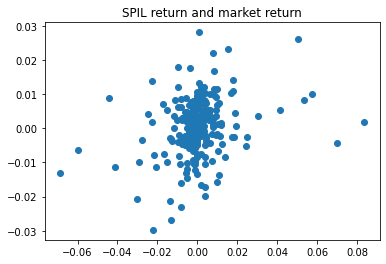

In [11]:
# 畫出散佈圖
import matplotlib.pyplot as plt
plt.title('SPIL return and market return')
plt.scatter(Excess_ret.values[:,0],Excess_ret.values[:,1])

In [12]:
# 擬合CAMP模型
import statsmodels.api as sm
model = sm.OLS(Excess_ret.returns[1:], sm.add_constant(Excess_ret.mktret[1:]))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     17.25
Date:                Tue, 04 May 2021   Prob (F-statistic):           4.55e-05
Time:                        17:49:51   Log-Likelihood:                 689.81
No. Observations:                 243   AIC:                            -1376.
Df Residuals:                     241   BIC:                            -1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.182      0.856      -0.002       0.002
mktret         0.4646      0.112      4.153      0.000       0.244       0.685
==============================================================================
Omnibus:                       90.258   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.757
Skew:                           1.053   Prob(JB):                    1.79e-256
Kurtosis:                      13.578   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""